In [ ]:
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
titanic_test = pd.read_csv('/content/drive/MyDrive/Projector_traning/titanic_test.csv')
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
titanic_train = pd.read_csv('/content/drive/MyDrive/titanic_train.csv')
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
feature_names = [
    'Name',
    'Pclass',
    'Sex',
    'Age',
    'SibSp',
    'Parch',
    'Fare',
    'Cabin',
    'Embarked',
    'Ticket'
]

In [ ]:
titanic_features_train = titanic_train[feature_names]
titanic_features_train.head()

,Name,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Ticket
0,"Braund, Mr. Owen Harris",3,male,22.0,1,0,7.2500,NaN,S,A/5 21171
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,71.2833,C85,C,PC 17599
2,"Heikkinen, Miss. Laina",3,female,26.0,0,0,7.9250,NaN,S,STON/O2. 3101282
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,53.1000,C123,S,113803
4,"Allen, Mr. William Henry",3,male,35.0,0,0,8.0500,NaN,S,373450


In [ ]:
titanic_label_train = titanic_train['Survived']
titanic_label_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
titanic_features_test = titanic_test[feature_names]
titanic_features_test.head()

,Name,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Ticket
0,"Kelly, Mr. James",3,male,34.5,0,0,7.8292,NaN,Q,330911
1,"Wilkes, Mrs. James (Ellen Needs)",3,female,47.0,1,0,7.0000,NaN,S,363272
2,"Myles, Mr. Thomas Francis",2,male,62.0,0,0,9.6875,NaN,Q,240276
3,"Wirz, Mr. Albert",3,male,27.0,0,0,8.6625,NaN,S,315154
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",3,female,22.0,1,1,12.2875,NaN,S,3101298


In [ ]:
titanic_features_train.isna().sum()

Name          0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
Ticket        0
dtype: int64

In [ ]:
titanic_features_test.isna().sum()

Name          0
Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
Ticket        0
dtype: int64

In [ ]:
titanic_features_train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
titanic_features_train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [ ]:
titanic_features_test['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [ ]:
titanic_features_test['Embarked'].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder

titanic_features_preprocessed_train = titanic_features_train.copy()
titanic_features_preprocessed_test = titanic_features_test.copy()

sex_encoder = OrdinalEncoder(categories=[['female', 'male']], dtype=int)
embarked_encoder = OrdinalEncoder(categories=[['Q', 'S', 'C']], dtype=int)

titanic_features_preprocessed_train['Sex'] = sex_encoder.fit_transform(titanic_features_preprocessed_train[['Sex']]) + 1
titanic_features_preprocessed_train['Embarked'].fillna('S', inplace=True) # 'S' is the most frequent
titanic_features_preprocessed_train['Embarked'] = embarked_encoder.fit_transform(titanic_features_preprocessed_train[['Embarked']])
age_mean = titanic_features_preprocessed_train['Age'].mean()
titanic_features_preprocessed_train['Age'].fillna(age_mean, inplace=True)

titanic_features_preprocessed_test['Sex'] = sex_encoder.transform(titanic_features_preprocessed_test[['Sex']]) + 1
titanic_features_preprocessed_test['Embarked'].fillna('S', inplace=True) # 'S' is the most frequent
titanic_features_preprocessed_test['Embarked'] = embarked_encoder.transform(titanic_features_preprocessed_test[['Embarked']])
titanic_features_preprocessed_test['Age'].fillna(age_mean, inplace=True)
fare_mean = titanic_features_preprocessed_train['Fare'].mean()
titanic_features_preprocessed_test['Fare'].fillna(fare_mean, inplace=True)

#titanic_features_preprocessed_train = pd.DataFrame(titanic_features_preprocessed_train, columns=feature_names)
#titanic_features_preprocessed_test = pd.DataFrame(titanic_features_preprocessed_test, columns=feature_names)

In [ ]:
titanic_features_preprocessed_train.head()

,Name,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Ticket
0,"Braund, Mr. Owen Harris",3,2,22.0,1,0,7.2500,NaN,1,A/5 21171
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,38.0,1,0,71.2833,C85,2,PC 17599
2,"Heikkinen, Miss. Laina",3,1,26.0,0,0,7.9250,NaN,1,STON/O2. 3101282
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,35.0,1,0,53.1000,C123,1,113803
4,"Allen, Mr. William Henry",3,2,35.0,0,0,8.0500,NaN,1,373450


In [ ]:
titanic_features_preprocessed_test.head()

,Name,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Ticket
0,"Kelly, Mr. James",3,2,34.5,0,0,7.8292,NaN,0,330911
1,"Wilkes, Mrs. James (Ellen Needs)",3,1,47.0,1,0,7.0000,NaN,1,363272
2,"Myles, Mr. Thomas Francis",2,2,62.0,0,0,9.6875,NaN,0,240276
3,"Wirz, Mr. Albert",3,2,27.0,0,0,8.6625,NaN,1,315154
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",3,1,22.0,1,1,12.2875,NaN,1,3101298


In [ ]:
from google.colab import files

def download_result(predictions, file_name):
  result = pd.DataFrame()
  result['PassengerId'] = titanic_test['PassengerId']
  result['Survived'] = (predictions > 0.5).astype(int)

  result.to_csv(file_name, index=False)
  files.download(file_name)

In [ ]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
num_rounds = 10000

**LightGBM**

In [ ]:
import lightgbm as lgb

boosting_feature_names = [
    #'Name',
    'Pclass',
    'Sex',
    'Age',
    'SibSp',
    'Parch',
    'Fare',
    #'Cabin',
    'Embarked',
    #'Ticket'
]

lgb_train = lgb.Dataset(
    titanic_features_preprocessed_train[boosting_feature_names],
    label=titanic_label_train,
    categorical_feature=['Pclass', 'Sex', 'Embarked'],
    free_raw_data=False)

lgb_parameters = {
    #default
    "objective": "binary",
    "learning_rate": 0.03,
    "num_threads": 10,
    "metric": 'binary_error',
    "seed": 42,

    #regularization
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "subsample_freq": 1
}

lgb_result = lgb.cv(lgb_parameters, lgb_train, num_rounds, folds=skf, eval_train_metric=True, callbacks=[lgb.early_stopping(30), lgb.log_evaluation(period=30)])

[LightGBM] [Info] Number of positive: 228, number of negative: 366
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008224 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 224
[LightGBM] [Info] Number of data points in the train set: 594, number of used features: 7
[LightGBM] [Info] Number of positive: 228, number of negative: 366
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002569 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 224
[LightGBM] [Info] Number of data points in the train set: 594, number of used features: 7
[LightGBM] [Info] Number of positive: 228, number of negative: 366
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002520 second

In [ ]:
lgb_model = lgb.train(params=lgb_parameters, train_set=lgb_train, num_boost_round=84)
lgb_predictions = lgb_model.predict(titanic_features_preprocessed_test[boosting_feature_names])
download_result(lgb_predictions, 'lgb_result.csv')

[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001548 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 224
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
def print_feature_importance(lgb_model, train_features):
  feature_importance = lgb_model.feature_importance()

  # Print feature importance
  for i, importance in sorted(enumerate(feature_importance), key=lambda x: x[1], reverse=True):
    print(f"Feature '{train_features[i]}': Importance = {importance}")

In [ ]:
print_feature_importance(lgb_model, boosting_feature_names)

Feature 'Fare': Importance = 988
Feature 'Age': Importance = 745
Feature 'Pclass': Importance = 132
Feature 'Embarked': Importance = 122
Feature 'SibSp': Importance = 83
Feature 'Sex': Importance = 70
Feature 'Parch': Importance = 54


**Kaggle score:** <br>
LightGBM (wil native feature only): 0.77751

**Adding new features**

In [ ]:
def add_family_features(data):
    data['Title'] = data['Name'].str.extract('([A-Za-z]+)\.', expand=False)
    data['Family Size'] = data['SibSp'] + data['Parch']
    data['Is Alone'] = (data['Family Size'] == 0).astype(int)

    bins = [0, 18, 35, 60, 100]
    labels = ['Child', 'Young Adult', 'Adult', 'Elderly']
    data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)
    data['Fare per Person'] = data['Fare'] / (data['Family Size'] + 1)

In [ ]:
add_family_features(titanic_features_preprocessed_train)
add_family_features(titanic_features_preprocessed_test)

In [ ]:
def add_cabin_features(data):
    data['Cabin'] = data['Cabin'].astype(str).replace('nan', 'z')
    data['Cabin_Deck'] = data['Cabin'].str[0]
    print(data['Cabin_Deck'].unique())

In [ ]:
add_cabin_features(titanic_features_preprocessed_train)
add_cabin_features(titanic_features_preprocessed_test)

['z' 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']
['z' 'B' 'E' 'A' 'C' 'D' 'F' 'G']


Let's create SES index based on Pclass and Fare - it will show social and economical status

In [ ]:
def calculate_ses_index(data):
    data['SES_Index'] = data['Pclass'] * data['Fare']

In [ ]:
calculate_ses_index(titanic_features_preprocessed_train)
calculate_ses_index(titanic_features_preprocessed_test)

Let's create a feature that will show interaction between Sex and SES Index

In [ ]:
def calculate_sex_ses_interaction(data):
    data['Sex_SES_interaction'] = data['Sex'] * data['SES_Index']

In [ ]:
calculate_sex_ses_interaction(titanic_features_preprocessed_train)
calculate_sex_ses_interaction(titanic_features_preprocessed_test)

Let's create a feature that will show interaction between Age and SES Index

In [ ]:
def calculate_age_ses_interaction(data):
    data['Age_SES_interaction'] = data['Age'] * data['SES_Index']

In [ ]:
calculate_age_ses_interaction(titanic_features_preprocessed_train)
calculate_age_ses_interaction(titanic_features_preprocessed_test)

Let's create a feature Name length

In [ ]:
def calculate_name_length(data):
    data['Name_Length'] = data['Name'].apply(lambda x: len(x))


In [ ]:
calculate_name_length(titanic_features_preprocessed_train)
calculate_name_length(titanic_features_preprocessed_test)


Let's create a feature Deck

In [ ]:
print(titanic_features_preprocessed_train.head(10))

                                                Name  Pclass  Sex        Age  \
0                            Braund, Mr. Owen Harris       3    2  22.000000   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...       1    1  38.000000   
2                             Heikkinen, Miss. Laina       3    1  26.000000   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)       1    1  35.000000   
4                           Allen, Mr. William Henry       3    2  35.000000   
5                                   Moran, Mr. James       3    2  29.699118   
6                            McCarthy, Mr. Timothy J       1    2  54.000000   
7                     Palsson, Master. Gosta Leonard       3    2   2.000000   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)       3    1  27.000000   
9                Nasser, Mrs. Nicholas (Adele Achem)       2    1  14.000000   

   SibSp  Parch     Fare Cabin  Embarked            Ticket   Title  \
0      1      0   7.2500     z         1         

**Dimensionality reduction**

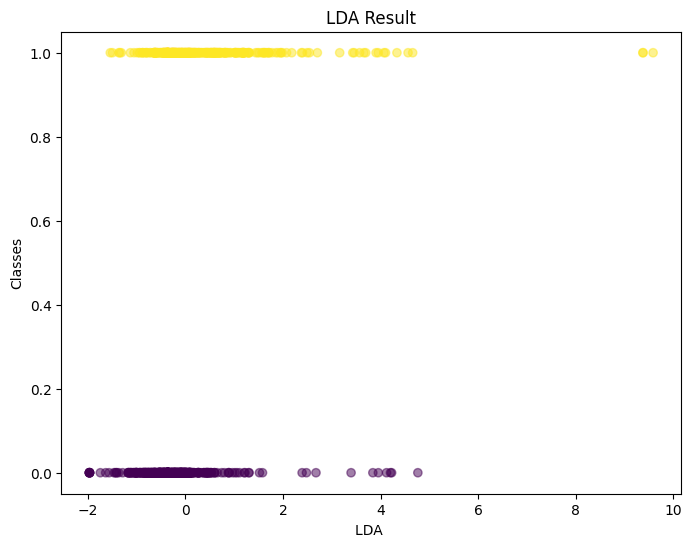

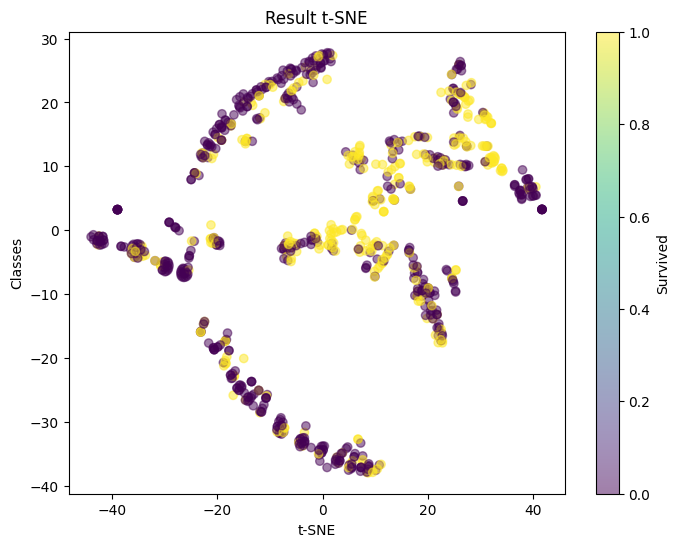

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, FastICA
from sklearn.impute import SimpleImputer
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

def lda(X, y):
  numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']
  numerical_data = X[numerical_features]

  scaler = StandardScaler()
  scaled_data = scaler.fit_transform(numerical_data)

  lda = LinearDiscriminantAnalysis(n_components=1)
  lda_data = lda.fit_transform(scaled_data, y)

  plt.figure(figsize=(8, 6))
  plt.scatter(lda_data[:, 0], y, c=y, cmap='viridis', alpha=0.5)
  plt.xlabel('LDA ')
  plt.ylabel('Classes')
  plt.title('LDA Result')
  plt.show()

  tsne = TSNE(n_components=2, random_state=42)
  tsne_data = tsne.fit_transform(scaled_data)

  plt.figure(figsize=(8, 6))
  plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=y, cmap='viridis', alpha=0.5)
  plt.colorbar(label='Survived')
  plt.xlabel('t-SNE')
  plt.ylabel('Classes')
  plt.title('Result t-SNE')
  plt.show()


  plt.tight_layout()
  plt.show()

lda(titanic_features_preprocessed_train, titanic_label_train)

**Clustering**

In [ ]:
from sklearn.cluster import KMeans

def add_cluster_features(data):
    cluster_data = data[['Fare']].copy()
    cluster_data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(cluster_data)

    kmeans = KMeans(n_clusters=5, random_state=42)
    data['Cluster'] = kmeans.fit_predict(scaled_data)

add_cluster_features(titanic_features_preprocessed_train)
add_cluster_features(titanic_features_preprocessed_test)
print("Titanic train dataset with cluster labels:")
print(titanic_features_preprocessed_train.head(10))
print(titanic_features_preprocessed_test.head(10))

Titanic train dataset with cluster labels:
                                                Name  Pclass  Sex        Age  \
0                            Braund, Mr. Owen Harris       3    2  22.000000   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...       1    1  38.000000   
2                             Heikkinen, Miss. Laina       3    1  26.000000   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)       1    1  35.000000   
4                           Allen, Mr. William Henry       3    2  35.000000   
5                                   Moran, Mr. James       3    2  29.699118   
6                            McCarthy, Mr. Timothy J       1    2  54.000000   
7                     Palsson, Master. Gosta Leonard       3    2   2.000000   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)       3    1  27.000000   
9                Nasser, Mrs. Nicholas (Adele Achem)       2    1  14.000000   

   SibSp  Parch     Fare Cabin  Embarked            Ticket   Title  \
0     

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
titanic_features_preprocessed_train.columns

Index(['Name', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked', 'Ticket', 'Title', 'Family Size', 'Is Alone', 'Age Group',
       'Fare per Person', 'Cabin_Deck', 'SES_Index', 'Sex_SES_interaction',
       'Age_SES_interaction', 'Name_Length', 'Cluster'],
      dtype='object')

In [ ]:
titanic_features_preprocessed_train.dtypes

Name                     object
Pclass                    int64
Sex                       int64
Age                     float64
SibSp                     int64
Parch                     int64
Fare                    float64
Cabin                    object
Embarked                  int64
Ticket                   object
Title                    object
Family Size               int64
Is Alone                  int64
Age Group              category
Fare per Person         float64
Cabin_Deck               object
SES_Index               float64
Sex_SES_interaction     float64
Age_SES_interaction     float64
Name_Length               int64
Cluster                   int32
dtype: object

In [ ]:
titanic_features_preprocessed_train.isna().sum()

Name                   0
Pclass                 0
Sex                    0
Age                    0
SibSp                  0
Parch                  0
Fare                   0
Cabin                  0
Embarked               0
Ticket                 0
Title                  0
Family Size            0
Is Alone               0
Age Group              0
Fare per Person        0
Cabin_Deck             0
SES_Index              0
Sex_SES_interaction    0
Age_SES_interaction    0
Name_Length            0
Cluster                0
dtype: int64

In [ ]:
titanic_features_preprocessed_test.isna().sum()

Name                   0
Pclass                 0
Sex                    0
Age                    0
SibSp                  0
Parch                  0
Fare                   0
Cabin                  0
Embarked               0
Ticket                 0
Title                  0
Family Size            0
Is Alone               0
Age Group              0
Fare per Person        0
Cabin_Deck             0
SES_Index              0
Sex_SES_interaction    0
Age_SES_interaction    0
Name_Length            0
Cluster                0
dtype: int64

**Analysis of adding features**

In [ ]:
from sklearn.preprocessing import LabelEncoder

titleEncoder = LabelEncoder()
titleEncoder.fit(titanic_features_preprocessed_train['Title'])
titleEncoder_dict = dict(zip(titleEncoder.classes_, titleEncoder.transform(titleEncoder.classes_)))
titanic_features_preprocessed_train['Title'] = titanic_features_preprocessed_train['Title'].apply(lambda x: titleEncoder_dict.get(x, -1))
titanic_features_preprocessed_test['Title'] = titanic_features_preprocessed_test['Title'].apply(lambda x: titleEncoder_dict.get(x, -1))

cabinEncoder = LabelEncoder()
cabinEncoder.fit(titanic_features_preprocessed_train['Cabin_Deck'])
cabinEncoder_dict = dict(zip(cabinEncoder.classes_, cabinEncoder.transform(cabinEncoder.classes_)))
titanic_features_preprocessed_train['Cabin_Deck'] = titanic_features_preprocessed_train['Cabin_Deck'].apply(lambda x: cabinEncoder_dict.get(x, -1))
titanic_features_preprocessed_test['Cabin_Deck'] = titanic_features_preprocessed_test['Cabin_Deck'].apply(lambda x: cabinEncoder_dict.get(x, -1))

ageGroupEncoder = LabelEncoder()
ageGroupEncoder.fit(titanic_features_preprocessed_train['Age Group'])
ageGroupEncoder_dict = dict(zip(ageGroupEncoder.classes_, ageGroupEncoder.transform(ageGroupEncoder.classes_)))
titanic_features_preprocessed_train['Age Group'] = titanic_features_preprocessed_train['Age Group'].apply(lambda x: ageGroupEncoder_dict.get(x, -1))
titanic_features_preprocessed_test['Age Group'] = titanic_features_preprocessed_test['Age Group'].apply(lambda x: ageGroupEncoder_dict.get(x, -1))

boosting_feature_names = [
    'Pclass',
    'Sex',
    'Age',
    'SibSp',
    'Parch',
    'Fare',
    'Embarked',
    'Title',
    'Family Size',
    'Is Alone',
    'Age Group',
    'Fare per Person',
    'Cabin_Deck',
    'SES_Index',
    'Sex_SES_interaction',
    'Age_SES_interaction',
    'Name_Length',
    'Cluster'
]

lgb_train = lgb.Dataset(
    titanic_features_preprocessed_train[boosting_feature_names],
    label=titanic_label_train,
    categorical_feature=['Pclass', 'Sex', 'Embarked', 'Title', 'Is Alone', 'Age Group', 'Cabin_Deck', 'Cluster'],
    free_raw_data=False)

lgb_parameters = {
    #default
    "objective": "binary",
    "learning_rate": 0.03,
    "num_threads": 10,
    "metric": 'binary_error',
    "seed": 42,

    #regularization
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "subsample_freq": 1
}

lgb_result = lgb.cv(lgb_parameters, lgb_train, num_rounds, folds=skf, eval_train_metric=True, callbacks=[lgb.early_stopping(30), lgb.log_evaluation(period=30)])

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 228, number of negative: 366
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002831 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1164
[LightGBM] [Info] Number of data points in the train set: 594, number of used features: 18
[LightGBM] [Info] Number of positive: 228, number of negative: 366
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003292 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1164
[LightGBM] [Info] Number of data points in the train set: 594, number of used features: 18
[LightGBM] [Info] Number of positive: 228, number of negative: 366
[LightGBM] [Info]

In [ ]:
lgb_model = lgb.train(params=lgb_parameters, train_set=lgb_train, num_boost_round=75)
lgb_predictions = lgb_model.predict(titanic_features_preprocessed_test[boosting_feature_names])
download_result(lgb_predictions, 'lgb_result.csv')

[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005499 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1164
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print_feature_importance(lgb_model, boosting_feature_names)

Feature 'Age_SES_interaction': Importance = 428
Feature 'Fare per Person': Importance = 284
Feature 'Name_Length': Importance = 254
Feature 'Age': Importance = 225
Feature 'Fare': Importance = 210
Feature 'SES_Index': Importance = 170
Feature 'Sex_SES_interaction': Importance = 110
Feature 'Pclass': Importance = 75
Feature 'Embarked': Importance = 69
Feature 'Sex': Importance = 57
Feature 'Family Size': Importance = 38
Feature 'Title': Importance = 22
Feature 'SibSp': Importance = 17
Feature 'Parch': Importance = 17
Feature 'Cabin_Deck': Importance = 9
Feature 'Cluster': Importance = 7
Feature 'Is Alone': Importance = 2
Feature 'Age Group': Importance = 0



**Kaggle Score**: 0.78005


**Let's delete 2 minimal important features Age Group, Is Alone and see results**

In [ ]:
from sklearn.preprocessing import LabelEncoder

titleEncoder = LabelEncoder()
titleEncoder.fit(titanic_features_preprocessed_train['Title'])
titleEncoder_dict = dict(zip(titleEncoder.classes_, titleEncoder.transform(titleEncoder.classes_)))
titanic_features_preprocessed_train['Title'] = titanic_features_preprocessed_train['Title'].apply(lambda x: titleEncoder_dict.get(x, -1))
titanic_features_preprocessed_test['Title'] = titanic_features_preprocessed_test['Title'].apply(lambda x: titleEncoder_dict.get(x, -1))

cabinEncoder = LabelEncoder()
cabinEncoder.fit(titanic_features_preprocessed_train['Cabin_Deck'])
cabinEncoder_dict = dict(zip(cabinEncoder.classes_, cabinEncoder.transform(cabinEncoder.classes_)))
titanic_features_preprocessed_train['Cabin_Deck'] = titanic_features_preprocessed_train['Cabin_Deck'].apply(lambda x: cabinEncoder_dict.get(x, -1))
titanic_features_preprocessed_test['Cabin_Deck'] = titanic_features_preprocessed_test['Cabin_Deck'].apply(lambda x: cabinEncoder_dict.get(x, -1))

boosting_feature_names = [
    'Pclass',
    'Sex',
    'Age',
    'SibSp',
    'Parch',
    'Fare',
    'Embarked',
    'Title',
    'Family Size',
    #'Is Alone',
    #'Age Group',
    'Fare per Person',
    'Cabin_Deck',
    'SES_Index',
    'Sex_SES_interaction',
    'Age_SES_interaction',
    'Name_Length',
    'Cluster'
]

lgb_train = lgb.Dataset(
    titanic_features_preprocessed_train[boosting_feature_names],
    label=titanic_label_train,
    categorical_feature=['Pclass', 'Sex', 'Embarked', 'Title', 'Cabin_Deck', 'Cluster'],
    free_raw_data=False)

lgb_parameters = {
    #default
    "objective": "binary",
    "learning_rate": 0.03,
    "num_threads": 10,
    "metric": 'binary_error',
    "seed": 42,

    #regularization
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "subsample_freq": 1
}

lgb_result = lgb.cv(lgb_parameters, lgb_train, num_rounds, folds=skf, eval_train_metric=True, callbacks=[lgb.early_stopping(30), lgb.log_evaluation(period=30)])

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 228, number of negative: 366
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003018 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1156
[LightGBM] [Info] Number of data points in the train set: 594, number of used features: 16
[LightGBM] [Info] Number of positive: 228, number of negative: 366
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002881 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1156
[LightGBM] [Info] Number of data points in the train set: 594, number of used features: 16
[LightGBM] [Info] Number of positive: 228, number of negative: 366
[LightGBM] [Info]

In [ ]:
lgb_model = lgb.train(params=lgb_parameters, train_set=lgb_train, num_boost_round=61)
lgb_predictions = lgb_model.predict(titanic_features_preprocessed_test[boosting_feature_names])
download_result(lgb_predictions, 'lgb_result.csv')

[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002677 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1156
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

** Score**

**Kaggle** 0.78205

In [ ]:
print_feature_importance(lgb_model, boosting_feature_names)

Feature 'Age_SES_interaction': Importance = 313
Feature 'Age': Importance = 232
Feature 'Fare per Person': Importance = 207
Feature 'Name_Length': Importance = 203
Feature 'Fare': Importance = 199
Feature 'SES_Index': Importance = 150
Feature 'Embarked': Importance = 71
Feature 'Sex_SES_interaction': Importance = 58
Feature 'Pclass': Importance = 48
Feature 'Sex': Importance = 45
Feature 'Family Size': Importance = 32
Feature 'Title': Importance = 19
Feature 'SibSp': Importance = 10
Feature 'Parch': Importance = 9
Feature 'Cabin_Deck': Importance = 7
Feature 'Cluster': Importance = 7
